In [ ]:
!pip install keras_preprocessing
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -P '/content/drive/MyDrive/' 'https://huggingface.co/spaces/mxz/emtion/resolve/c697775e0adc35a9cec32bd4d3484b5f5a263748/fer2013.csv'

--2024-02-02 11:29:38--  https://huggingface.co/spaces/mxz/emtion/resolve/c697775e0adc35a9cec32bd4d3484b5f5a263748/fer2013.csv
Resolving huggingface.co (huggingface.co)... 13.35.7.81, 13.35.7.57, 13.35.7.38, ...
Connecting to huggingface.co (huggingface.co)|13.35.7.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/3b/c7/3bc77c911584e806e5f9f67b2a9abdafd030fdfe2a2a2c944b9700b13390ff2c/3b8d9617d1017f34733c8f2474d7784c563ce86c40a86ac12c2d37cc968f871b?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27fer2013.csv%3B+filename%3D%22fer2013.csv%22%3B&response-content-type=text%2Fcsv&Expires=1707132578&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNzEzMjU3OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy8zYi9jNy8zYmM3N2M5MTE1ODRlODA2ZTVmOWY2N2IyYTlhYmRhZmQwMzBmZGZlMmEyYTJjOTQ0Yjk3MDBiMTMzOTBmZjJjLzNiOGQ5NjE3ZDEwMTdmMzQ3MzNjOGYyNDc0ZDc3ODRjNTYzY2U

In [ ]:
# we first import our dataset. FER2013 contains about 30,000 greyscale images, each 48by 48, centered and showing 7
#emotions: Anger, Disgust, Happiness, Neutral, fear, sadness, and surprise
# import the data and view it
data = pd.read_csv('/content/drive/MyDrive/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#The emotion variable represents emotions and is our target variable. Pixels variable expresses the value per pixel in the photos.
#Usage, on the other hand, shows which set the row it belongs to (such as training and testing)

print("the number of data items = ", data.shape)
print("the attributes we tabularized them with = ", data.columns)

the number of data items =  (35887, 3)
the attributes we tabularized them with =  Index(['emotion', 'pixels', 'Usage'], dtype='object')


In [ ]:
#looking at our training and test sets and separating these sets
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
# we divide the data into traning, public test and private test
training = data.loc[data["Usage"] == "Training"]
public_test = data.loc[data["Usage"] == "PublicTest"]
private_test = data.loc[data["Usage"] == "PrivateTest"]

print("traning data = ", training.shape)
print("public test data = ", public_test.shape)
print("private test data = ", private_test.shape)

traning data =  (28709, 3)
public test data =  (3589, 3)
private test data =  (3589, 3)


In [ ]:
#If we want to see how much of which emotion is in each of our data sets
print("========================= Emotion distribution ===========================")
print("train data = \n{}, \npublic data = \n{}, \nprivate data= \n{}".format(training["emotion"].value_counts(),
      public_test["emotion"].value_counts(), private_test["emotion"].value_counts()))

========================= Emotion distribution ===========================
train data = 
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64, 
public data = 
3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: emotion, dtype: int64, 
private data= 
3    879
6    626
4    594
2    528
0    491
5    416
1     55
Name: emotion, dtype: int64


In [ ]:
!wget -P '/content/drive/MyDrive/' 'https://www.kaggle.com/datasets/msambare/fer2013/download?datasetVersionNumber=1'

--2024-02-02 11:42:07--  https://www.kaggle.com/datasets/msambare/fer2013/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fmsambare%2Ffer2013%2Fversions%2F1%3Fresource%3Ddownload [following]
--2024-02-02 11:42:07--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fmsambare%2Ffer2013%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/MyDrive/download?datasetVersionNumber=1’

download?datasetVer     [ <=>                ]   4.80K  --.-KB/s    in 0.01s   


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/')
os.listdir('destination_folder/')
# Set the paths to the train and test folders
train_folder = '/content/drive/MyDrive/destination_folder/FER2013_dataset/train'
test_folder = '/content/drive/MyDrive/destination_folder/FER2013_dataset/test'

# Function to count the number of images in a folder (including subdirectories)
def count_images(folder):
    count = 0
    for root, dirs, files in os.walk(folder):
        count += len(files)
    return count

# Count images in the train and test folders
train_images_count = count_images(train_folder)
test_images_count = count_images(test_folder)

# Print the results
print(f"Number of images in the train folder: {train_images_count}")
print(f"Number of images in the test folder: {test_images_count}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of images in the train folder: 28709
Number of images in the test folder: 7178


In [ ]:
#alternatively if we want to make the csv file from the pictures we have gathered( the fer2013 dataset in our directory):
import os
import cv2
import pandas as pd
from tqdm import tqdm  # tqdm for progress bar

# Function to load images and labels from folders
def load_images_and_labels(root_folder, usage):
    images = []
    labels = []

    for emotion_label in os.listdir(root_folder):
        emotion_path = os.path.join(root_folder, emotion_label)

        for image_name in tqdm(os.listdir(emotion_path), desc=f"Loading {emotion_label} for {usage}"):
            image_path = os.path.join(emotion_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            flattened_image = image.flatten()
            images.append(flattened_image)
            labels.append(((emotion_label), usage))

    return images, labels
# Paths to the root folders for training and test datasets
train_root_folder = '/content/drive/MyDrive/destination_folder/FER2013_dataset/train'
test_root_folder = '/content/drive/MyDrive/destination_folder/FER2013_dataset/test'

# Load training images and labels
train_images, train_labels = load_images_and_labels(train_root_folder, 'training')

# Load test images and labels
test_images, test_labels = load_images_and_labels(test_root_folder, 'testing')

# Create DataFrames
train_df = pd.DataFrame(data={'Emotion': [label[0] for label in train_labels], 'Usage': [label[1] for label in train_labels], 'Pixels': train_images})
test_df = pd.DataFrame(data={'Emotion': [label[0] for label in test_labels], 'Usage': [label[1] for label in test_labels], 'Pixels': test_images})

# Concatenate DataFrames
main_df = pd.concat([train_df, test_df], ignore_index=True)

# Save DataFrame to CSV file
main_df.to_csv('main_dataset.csv', index=False)

Loading surprise for testing: 100%|██████████| 831/831 [00:26<00:00, 30.79it/s] 


In [ ]:
scratch_data = pd.read_csv('main_dataset.csv')
scratch_data.head()

,Emotion,Usage,Pixels
0,angry,training,[131 133 131 ... 173 179 177]
1,angry,training,[118 118 142 ... 96 97 99]
2,angry,training,[83 87 88 ... 71 68 81]
3,angry,training,[ 32 37 45 ... 220 220 214]
4,angry,training,[245 227 218 ... 18 18 15]


In [ ]:
print("num of images", scratch_data.shape)
print("their classifications = ", scratch_data.columns)

num of images (35887, 3)
their classifications =  Index(['Emotion', 'Usage', 'Pixels'], dtype='object')


In [ ]:
emotion_mapping = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6
}

# Function to convert string labels to numerical labels
def convert_into_int(emotion_labels):
    return [emotion_mapping[label] for label in emotion_labels]

# Load the main dataset CSV file into a DataFrame
main_df = pd.read_csv('main_dataset.csv')

# Convert string labels to numerical labels
scratch_data['Emotion'] = convert_into_int(scratch_data['Emotion'])

# Save the updated DataFrame to a new CSV file
scratch_data.to_csv('main_dataset1.csv', index=False)

In [ ]:
scratch_data.head()

,Emotion,Usage,Pixels
0,0,training,[131 133 131 ... 173 179 177]
1,0,training,[118 118 142 ... 96 97 99]
2,0,training,[83 87 88 ... 71 68 81]
3,0,training,[ 32 37 45 ... 220 220 214]
4,0,training,[245 227 218 ... 18 18 15]


In [ ]:
scratch_data["Usage"].value_counts()

training    28709
testing      7178
Name: Usage, dtype: int64

In [ ]:
#we divide our data based on this usage value(aka the folder it is in)
scratchtraining = scratch_data.loc[scratch_data["Usage"] == "training"]
scratchtesting = scratch_data.loc[scratch_data["Usage"] == "testing"]

print("traning data = ", scratchtraining.shape)
print("test data = ", scratchtesting.shape)


traning data =  (28709, 3)
test data =  (7178, 3)


In [ ]:
# if we want to import show the number of each emotion
scratch_data

,Emotion,Usage,Pixels
0,0,training,[131 133 131 ... 173 179 177]
1,0,training,[118 118 142 ... 96 97 99]
2,0,training,[83 87 88 ... 71 68 81]
3,0,training,[ 32 37 45 ... 220 220 214]
4,0,training,[245 227 218 ... 18 18 15]
...,...,...,...
35882,5,testing,[239 241 240 ... 191 191 191]
35883,5,testing,[47 45 51 ... 15 22 25]
35884,5,testing,[ 68 79 89 ... 204 207 213]
35885,5,testing,[228 222 210 ... 149 131 123]


In [ ]:
scratch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  35887 non-null  int64 
 1   Usage    35887 non-null  object
 2   Pixels   35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


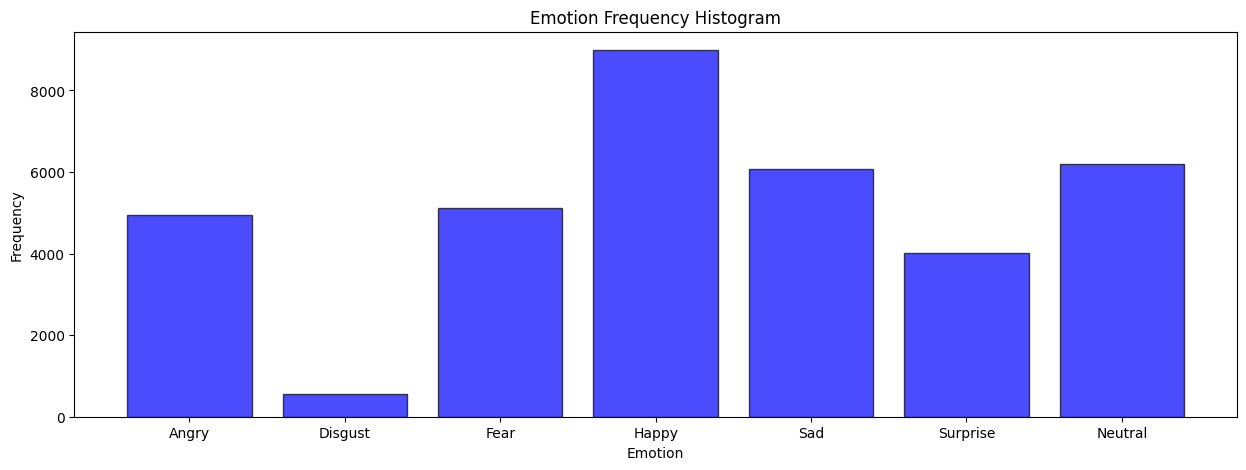

In [ ]:
# the emotional frequency in our dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.hist(data['emotion'], bins=range(8), align='left', rwidth=0.8, alpha=0.7, color='blue', edgecolor='black')

plt.title('Emotion Frequency Histogram')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(range(7), ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.show()

Preprocessing the images.

We will categorize it by taking the "emotion" column which is our answers. In other words, we will output a transaction with 0 in all the remaining lines except the class it is in.
) We will take the pixels column in our set and turn it into a tensor and standardize it.

In [ ]:
train_labels = training["emotion"]
train_labels = to_categorical(train_labels)

train_pixels = training["pixels"].str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)
train_pixels = train_pixels.reshape((28709, 48, 48, 1))
train_pixels = train_pixels.astype("float32") / 255


private_labels = private_test["emotion"]
private_labels = to_categorical(private_labels)

private_pixels = private_test["pixels"].str.split(" ").tolist()
private_pixels = np.uint8(private_pixels)
private_pixels = private_pixels.reshape((3589, 48, 48, 1))
private_pixels = private_pixels.astype("float32") / 255


public_labels = public_test["emotion"]
public_labels = to_categorical(public_labels)

public_pixels = public_test["pixels"].str.split(" ").tolist()
public_pixels = np.uint8(public_pixels)
public_pixels = public_pixels.reshape((3589, 48, 48, 1))
public_pixels = public_pixels.astype("float32") / 255


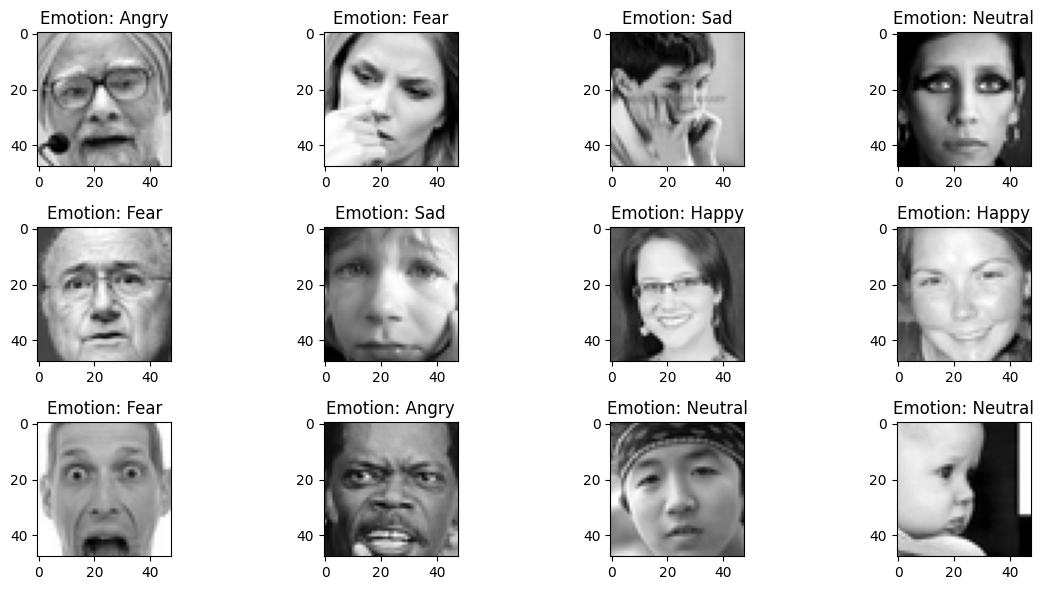

In [ ]:
#to look at some of the photos
import matplotlib.pyplot as plt
import seaborn as sns
emo_map = {
    (1, 0, 0, 0, 0, 0, 0): 'Angry',
    (0, 1, 0, 0, 0, 0, 0): 'Disgust',
    (0, 0, 1, 0, 0, 0, 0): 'Fear',
    (0, 0, 0, 1, 0, 0, 0): 'Happy',
    (0, 0, 0, 0, 1, 0, 0): 'Sad',
    (0, 0, 0, 0, 0, 1, 0): 'Surprise',
    (0, 0, 0, 0, 0, 0, 1): 'Neutral',
}
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(train_pixels[i, :, :, 0], cmap="gray")
    emo_label = emo_map.get(tuple(train_labels[i]), 'Unknown')

    plt.title(f'Emotion: {emo_label}')


plt.tight_layout()
plt.show()

Exploring the data, Doing some visualizaions

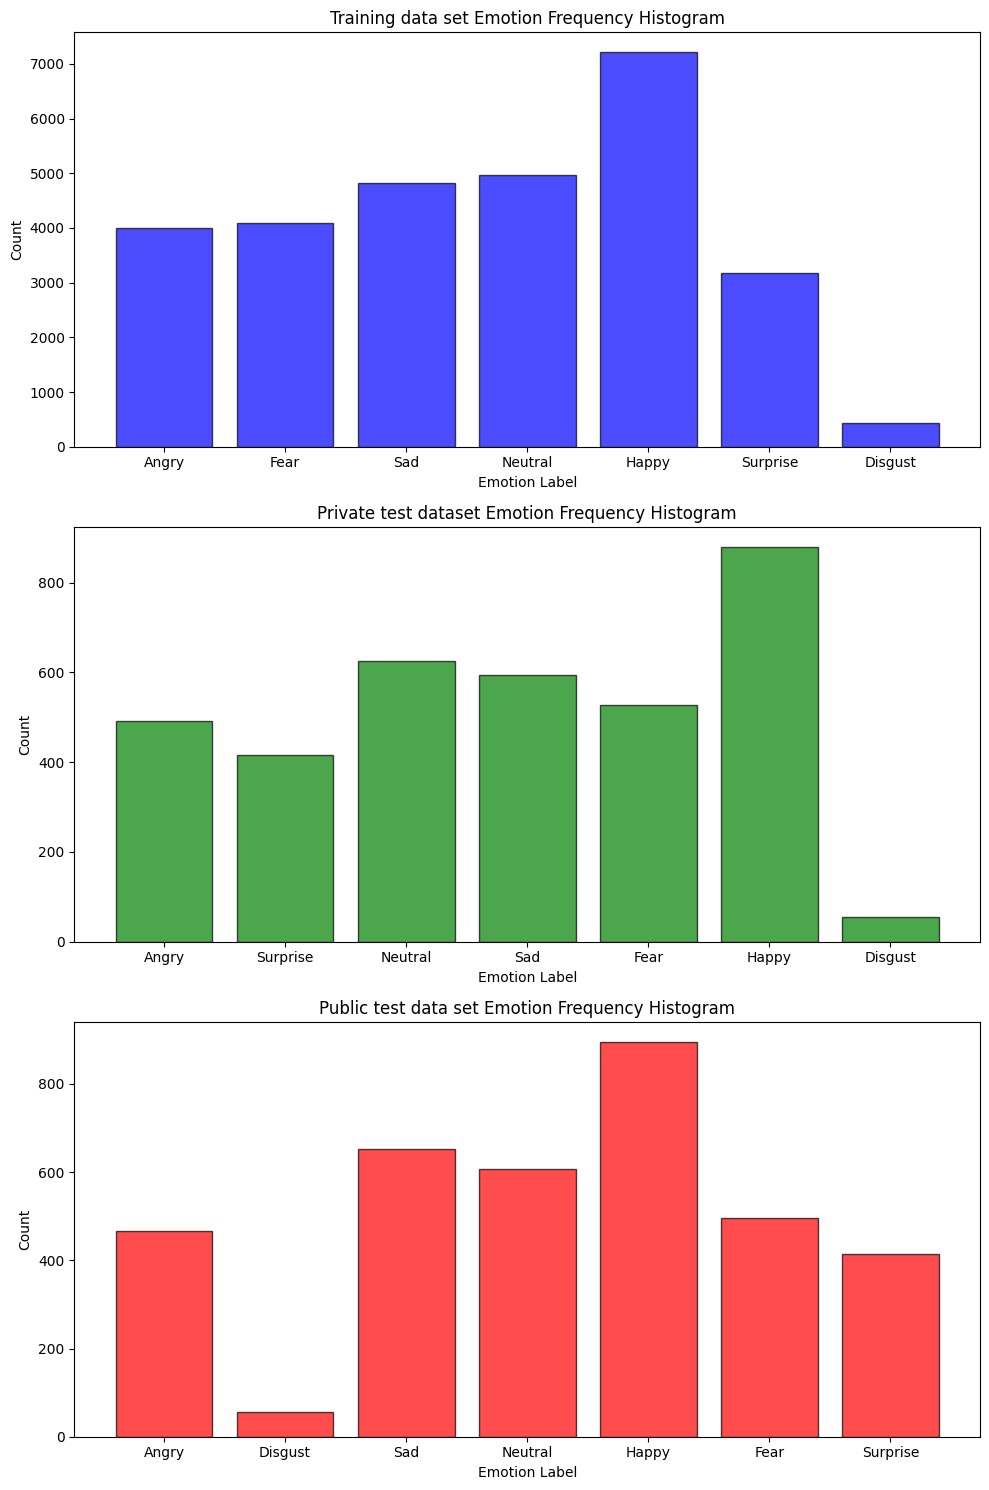

In [ ]:
# Do some visualization on the data, compare the emotion
# Assuming you already have train_labels, private_labels, and public_labels
emotion_mapping1 = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
# Convert one-hot encoded labels back to integer labels

train_labels_int = np.argmax(train_labels, axis=1)
private_labels_int = np.argmax(private_labels, axis=1)
public_labels_int = np.argmax(public_labels, axis=1)

# Plotting the counts
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Training dataset
train_labels_str = [emotion_mapping1[label] for label in train_labels_int]
axes[0].hist(train_labels_str, bins=range(8), align='left', rwidth=0.8, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Training data set Emotion Frequency Histogram')
axes[0].set_xlabel('Emotion Label')
axes[0].set_ylabel('Count')

# Private dataset
private_labels_str = [emotion_mapping1[label] for label in private_labels_int]
axes[1].hist(private_labels_str, bins=range(8), align='left', rwidth=0.8, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Private test dataset Emotion Frequency Histogram')
axes[1].set_xlabel('Emotion Label')
axes[1].set_ylabel('Count')

# Public dataset
public_labels_str = [emotion_mapping1[label] for label in public_labels_int]
axes[2].hist(public_labels_str, bins=range(8), align='left', rwidth=0.8, alpha=0.7, color='red', edgecolor='black')
axes[2].set_title('Public test data set Emotion Frequency Histogram')
axes[2].set_xlabel('Emotion Label')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.15.0
Keras version: 2.15.0


Model building!

we are going to use CNN to classify the images, we have already done the preprocessing to make sure the data is ready to build the model


In [ ]:
#the model is named model_1. the input is of images that are 48 by 48
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
#This creates an instance of a sequential model.
mymodel= models.Sequential()
#we build the first convolutional layer
mymodel.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))

#max pooling: This layer downsamples the spatial dimensions of the input by taking the maximum value over a pool of size (5, 5)
mymodel.add(layers.MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#Two additional convolutional layers with smaller kernel sizes and average pooling:
#Similar to max pooling, but takes the average instead of the maximum

mymodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
mymodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
mymodel.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#Convolutional Layers 4 and 5:
mymodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
mymodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
mymodel.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#Convert the multi-dimensional data to a one-dimensional array.
mymodel.add(layers.Flatten())

#Two fully connected layers with ReLU activation and dropout for regularization.
mymodel.add(layers.Dense(1024, activation='relu'))
mymodel.add(layers.Dropout(0.2))
mymodel.add(layers.Dense(1024, activation='relu'))
mymodel.add(layers.Dropout(0.2))
#output layer
mymodel.add(layers.Dense(7, activation='softmax'))

In [ ]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 20, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d (Average  (None, 7, 7, 64)          0         
 Pooling2D)                                                      
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         7

training the model now

In [ ]:
#"Adam" stands for Adaptive Moment Estimation.
#It is a popular optimization algorithm used in training deep learning models, including neural networks.
mymodel.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

#the training data (input features and corresponding labels) and the validation data
hist = mymodel.fit(train_pixels, train_labels, batch_size = 256, epochs = 30,
                validation_data = (private_pixels, private_labels))

Epoch 1/30
113/113 [==============================] - 238s 2s/step - loss: 1.8172 - accuracy: 0.2501 - val_loss: 1.7957 - val_accuracy: 0.2449
Epoch 2/30
113/113 [==============================] - 219s 2s/step - loss: 1.7512 - accuracy: 0.2709 - val_loss: 1.6941 - val_accuracy: 0.3137
Epoch 3/30
113/113 [==============================] - 217s 2s/step - loss: 1.6382 - accuracy: 0.3419 - val_loss: 1.5871 - val_accuracy: 0.3667
Epoch 4/30
113/113 [==============================] - 226s 2s/step - loss: 1.5356 - accuracy: 0.3965 - val_loss: 1.4894 - val_accuracy: 0.4216
Epoch 5/30
113/113 [==============================] - 218s 2s/step - loss: 1.4554 - accuracy: 0.4386 - val_loss: 1.5529 - val_accuracy: 0.4007
Epoch 6/30
113/113 [==============================] - 221s 2s/step - loss: 1.3991 - accuracy: 0.4623 - val_loss: 1.3532 - val_accuracy: 0.4734
Epoch 7/30
113/113 [==============================] - 226s 2s/step - loss: 1.3274 - accuracy: 0.4907 - val_loss: 1.3258 - val_accuracy: 0.4879

In [ ]:
# Assuming model is your trained model
mymodel.save('aaitproject.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

files.download('aaitproject.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Specify the file paths
source_path = 'aait_ml.h5'
destination_path = '/content/drive/MyDrive/aait_ml.h5'  # Adjust the destination path as needed

# Copy the file to Google Drive
shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/aait_ml.h5'

Now we judge the preformace of our model

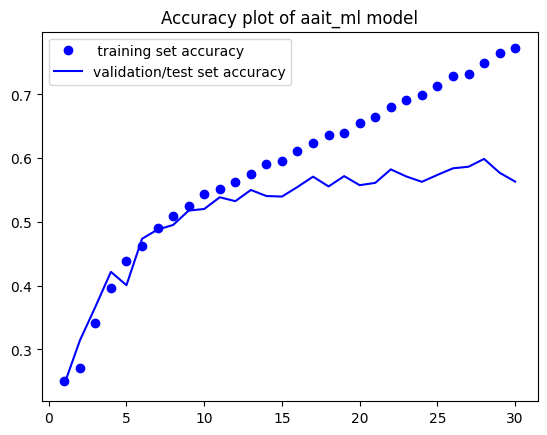

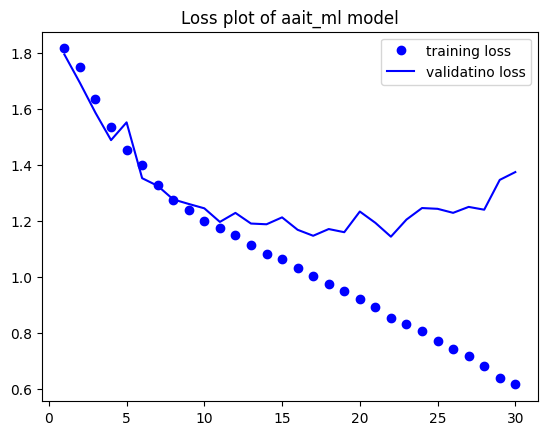

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/aaitproject.h5'
model = load_model(model_path)
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = " training set accuracy")
plt.plot(epochs, val_acc, "b", label = "validation/test set accuracy")
plt.title("Accuracy plot of aaitproject model")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "training loss")
plt.plot(epochs, val_loss, "b", label = "validatino loss")
plt.title("Loss plot of aaitproject model")
plt.legend()


plt.show()

In [ ]:


test_loss, test_acc = model.evaluate(public_pixels, public_labels)
print('test accuracy:', test_acc)

113/113 [==============================] - 5s 45ms/step - loss: 1.4229 - accuracy: 0.5587
test accuracy: 0.5586514472961426


In [ ]:
pred_test_labels = model.predict(public_pixels)

df_compare = pd.DataFrame()
df_compare['real'] = public_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

113/113 [==============================] - 7s 60ms/step


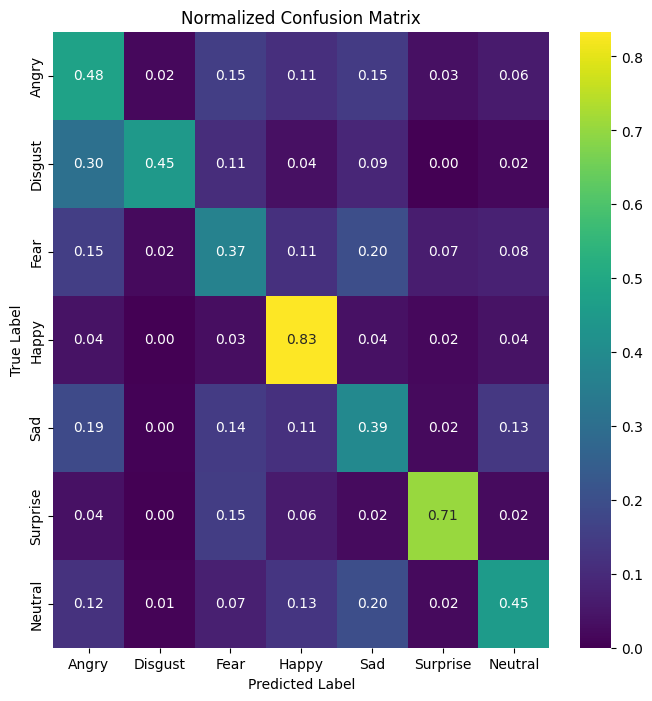

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


# conf_mat, public_labels, and pred_test_labels defined, this makes the confusion matrix
conf_mat = confusion_matrix(public_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

# Normalize the confusion matrix
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_norm, annot=True, fmt=".2f", cmap="viridis", xticklabels=emotions.values(), yticklabels=emotions.values())
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

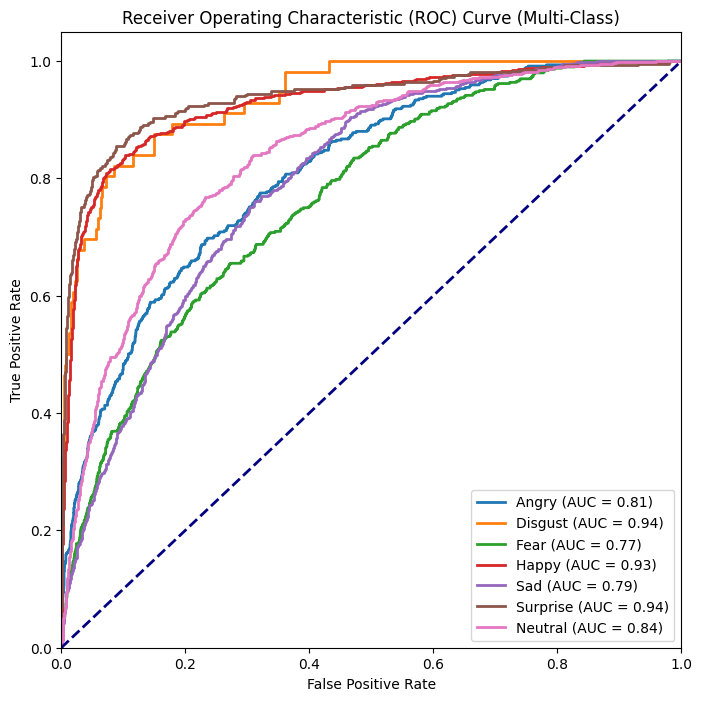

In [ ]:
#doing the ROC-AUC graph
#default Rc takes 2 values but we modify it for all 7 emotions
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels (one-hot encoded) for the multi-class case
true_labels_bin = label_binarize(public_labels.argmax(axis=1), classes=list(range(7)))

# Compute ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], pred_test_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for each class
plt.figure(figsize=(8, 8))
for i in range(7):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Multi-Class)')
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 0s 152ms/step


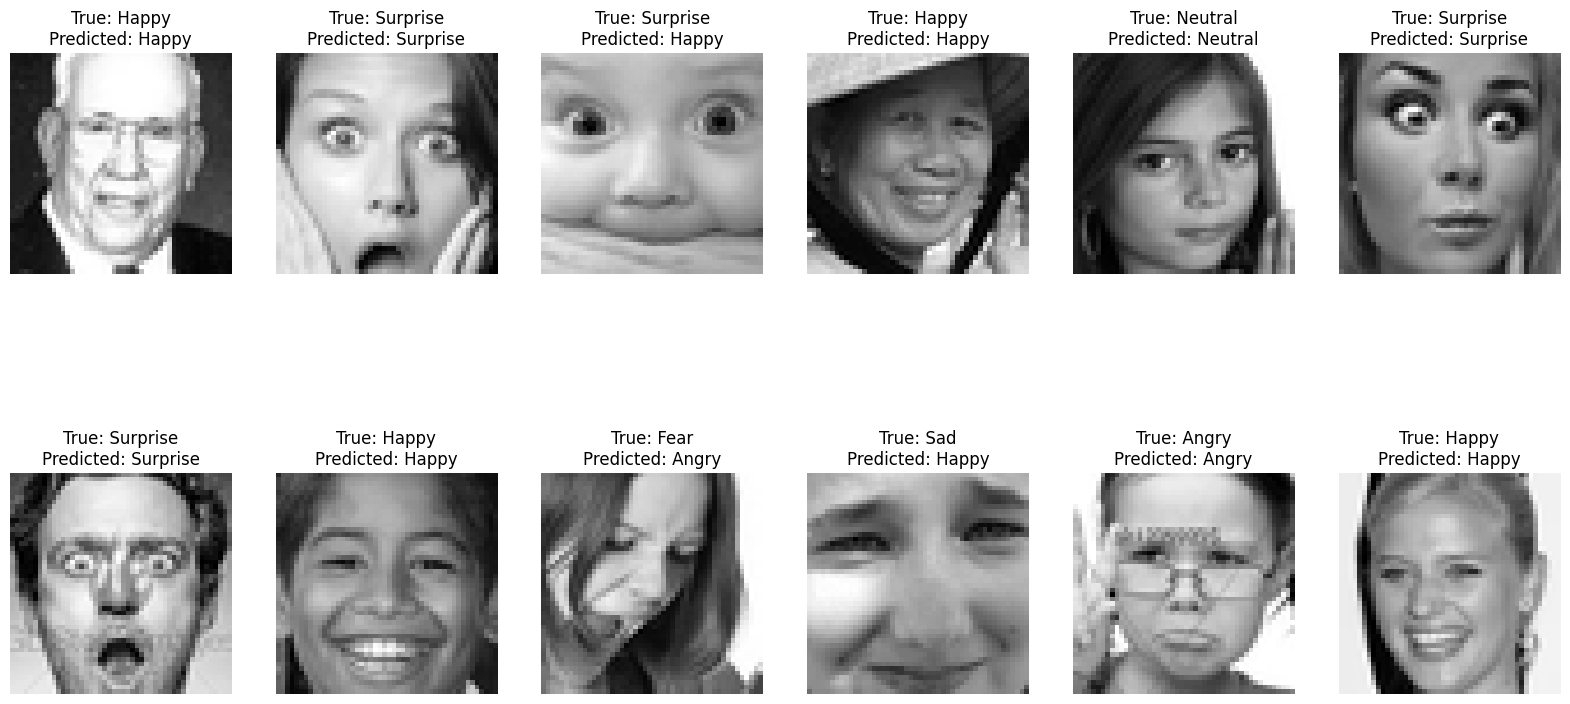

In [ ]:
import cv2

def display_random_images(model, images, labels, emotions, num_images=12, rows=1, cols=1):
    # Select random image indices
    random_indices = np.random.randint(0, len(images), size=num_images)

    # Plotting the images
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

    for i, random_index in enumerate(random_indices):
        row_position = i // cols
        col_position = i % cols
        # Extract the random image and label
        random_image = images[random_index]
        true_label = np.argmax(labels[random_index])  # Assuming labels are one-hot encoded

        # Convert the image to grayscale
        random_image_gray = random_image

        # Predict the label using the model
        pred_probs = model.predict(np.expand_dims(random_image_gray, axis=0))
        predicted_label = np.argmax(pred_probs)

        # Display the randomly selected grayscale image
        axes[row_position, col_position].imshow(random_image_gray, cmap='gray')
        axes[row_position, col_position].set_title(f'True: {emotions[true_label]}\nPredicted: {emotions[predicted_label]}')
        axes[row_position, col_position].axis('off')

    plt.show()


display_random_images(model, public_pixels, public_labels, emotions,num_images=12, rows=2, cols=6 )

# **Real time facial emotion recognition ** :
### copy and run it separately on vs code or some other editor for python if the webcam cant be accessed.

In [ ]:
#When copying check if versions in the editor and the trained model are similar, if not update or adjust before next step
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

In [ ]:
import keras
print("Keras version:", keras.__version__)
import cv2
from keras.models import load_model
import numpy as np

# Load our facial emotion recognition model and the emotional mapping to turn into string
emotion_mapping1 = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
model = load_model('aaitproject (1).h5')  #our path
model.compile(optimizer='adam',  # our desired optimizer
              loss=tf.keras.losses.sparse_categorical_crossentropy,  # our desired loss function
              metrics=['accuracy'])
# we create a cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# this is to access the webcam(usually, 0 corresponds to the default built-in webcam)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame from the camera or video source.")
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Preprocess the face region for our model
        face_roi = cv2.resize(gray[y:y + h, x:x + w], (48, 48))
        face_roi = np.expand_dims(np.expand_dims(face_roi, -1), 0) / 255.0

        # Predict emotion using our model
        emotion_probs = model.predict(face_roi)
        emotion_label = np.argmax(emotion_probs)

        # Draw a rectangle around the detected face and display the emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, f'Emotion: {emotion_mapping1[emotion_label]}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Frame', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break


# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

Error: Failed to capture frame from the camera or video source.


NameError: name 'faces' is not defined